<h1 style="font-size: 32px; text-align: center;">Introduction to Computer Programming for the Physical Sciences</h1>
<h2 style="font-size: 24px; text-align: center;">Shane Bechtel</h2>
<h3 style="font-size: 24px; text-align: center;">Spring 2024</h2>

## Working on Section Problems

<ul style="list-style: none;">
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Get into groups of 2 or 3, with at least one laptop per group.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Discuss with each other and attempt each problem yourselves first without AI support for 10-15 mins.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>Input the problem prompt into the AI chatbox, use its answer to verify your own, or to learn how it should be solved.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>For section problems, you can omit most of the commenting and focus on learning coding. For more difficult problems, minimal comments are still recommended as a way of organizing your own thoughts.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Please abide by the <b><a href="https://github.com/enigma-igm/Phys29/blob/main/using_AI_tools.md">Policy and Guidelines on Using AI Tools</a></b></li>

# Section 5

## Problem 1

You have seen the Fibonacci sequence of numbers, which are defined by the recursion relation
$$ x_{n + 1} = x_n + x_{n-1} $$
with $x_0 \equiv 0$ and $x_1 \equiv 1$.

(a) Write a code that plots up $x_n$ vs. n as points with no line connecting them, for n in the range 0 to 30. (You will need to store $x_n$ into a numpy array). Make sure to label your axes, you can use LaTeX to put the n subscript on $x_n$ in code like this:
```
plt.ylabel(r'$x_n$')
```

(b) You should find that most of the Fibonacci numbers in your plot are indistinguishable from zero because of the vertical scale of your plot. Fix this by plotting the same thing on a logarithmic vertical axis using ```plt.yscale('log')```. Use indexing to exclude the first n = 0 element of your arrays when you make this plot, as the log of $x_0 = 0$ is −∞.

hint: checkout lecture notes on matplotlib to see examples of how to make a plot, label the axes, and change the scale of the axes: https://github.com/enigma-igm/Phys29/blob/main/Phys29/lectures/Week5/01_matplotlib.ipynb

In [1]:
# your solution here
import matplotlib.pyplot as plt
import numpy as np

def fibonacci(n):

    if n == 0:
        return 0
    elif n == 1 or n == 2:
        return 1
    else:

        return fibbonaci(n-1) + fibbonaci(n-2)


In [2]:

n = np.arange(0,31) # Generate a range of integers from 0 to 30

x_n = [] # Create a list to hold our fibonacci seqence

for i in n: # Loop through each integer in array n

    next_term = fibonacci(i) # Calculate the next term of the fibonacci sequence
    
    x_n.append(next_term) # Store that term in our holder list

x_n = np.array(x_n) # Lastly, convert our list to a numpy array

print(n, x_n)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] [     0      1      1      2      3      5      8     13     21     34
     55     89    144    233    377    610    987   1597   2584   4181
   6765  10946  17711  28657  46368  75025 121393 196418 317811 514229
 832040]


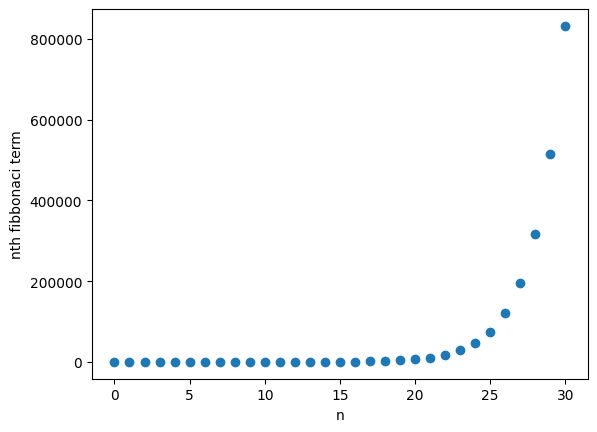

In [3]:

plt.scatter(n, x_n) # Plot each point individually
plt.ylabel(r'nth fibonacci term') # Adds a label to the y axis
plt.xlabel(r'n') # Adds a label to the x axis
plt.show() # This command tells python to complete the plot and show it at this point. It may not always be necessary, but is good practice to include once you have constructed your figure


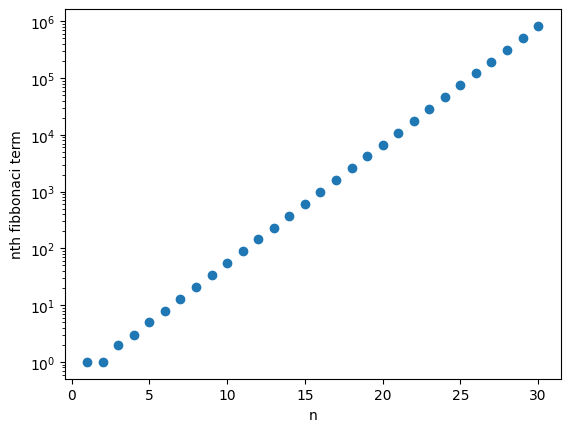

In [4]:

plt.scatter(n[1:], x_n[1:]) # Use slicing to ignore the issue of depicting 0 on the logarithmic scale
plt.ylabel(r'nth fibonacci term')
plt.xlabel(r'n')
plt.yscale('log') # Scale the y axis logarithmically
plt.show()


## Problem 2

Let's take a look at the lightly damped harmonic oscillator, whose solution is
$$x(t) = Ae^{-(\gamma/2)t} cos (\omega t + \phi) $$
where $x$ is the position, $\gamma$ describes how strong the damping is, $\omega$ is the angular frequency, $A$ is the amplitude, and $\phi$ is a phase.

Assume $A = 1 \, m$, $\omega = 1 rad\,s^{-1}$, $\gamma = 0.2$, and $\phi = 0$. 

Plot the motion of the oscillator between t = 0 and t = 15 seconds.

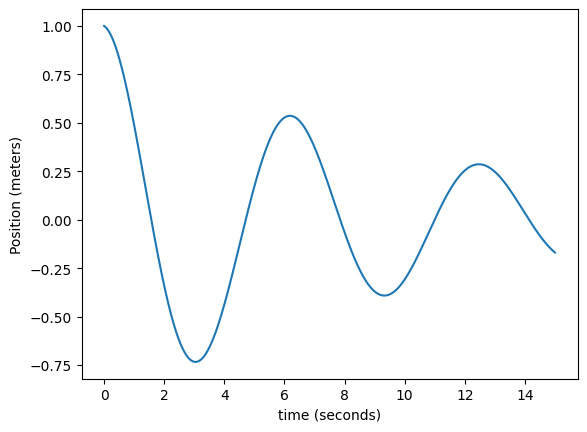

In [40]:
# your solution here

# hint:
# 1. create an array that samples many points in time (say 10000 points) between 0 and 15 seconds using np.linspace().
# 2. write a function x(t) that calculates x given t, based on the oscillator equation. Note that both the input t and the return x of the function are arrays.
#    or instead, you can directly create an array x with the same shape as your time array, and calculate x without using a function.
# 3. plot x vs t using plt.plot()

import numpy as np


t = np.linspace(0,15,10000) # Create a range of time values from 0 to 15 with 10000 equally spaced steps

def ldho(t,A=1,omega=1,gamma=0.2,phi=0): # Create a function to evaluate the lightly damped harmonic oscillator

    exp_term = A*np.exp(-0.5*gamma*t) # Calculate the exponential term

    trig_term = np.cos(omega*t + phi) # Calculate the trig term

    return exp_term*trig_term # Return the calculated value

x = ldho(t) # Pass the time array in as an argument for ldho() and store the resulting array in x

plt.plot(t,x) # This connects each individual point in a line, as opposed to the plt.scatter() function
plt.ylabel('Position (meters)')
plt.xlabel('time (seconds)')
plt.show()